In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import scipy.special as scsp
import scipy.stats as sist

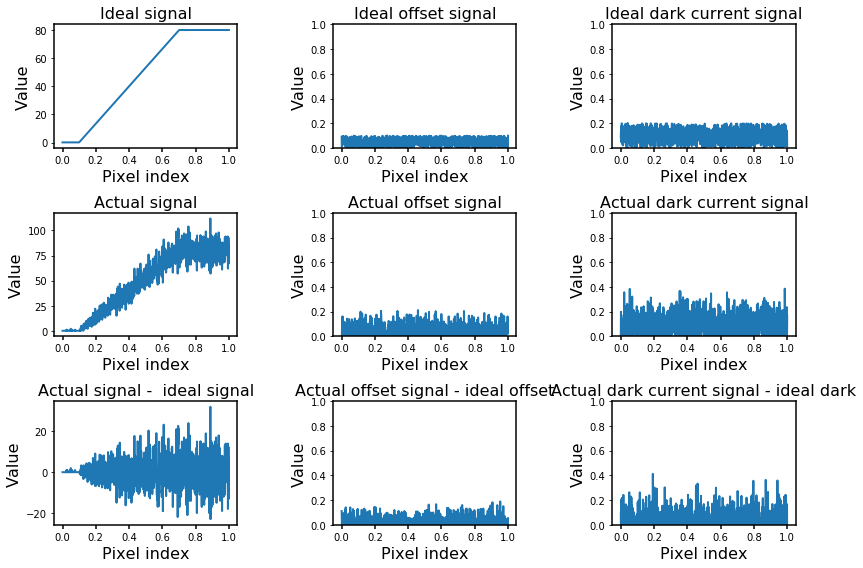

In [85]:
# define stuff for studying signal
def generate_instance():
    _dtype = np.uint16
    _dt = np.iinfo(_dtype)
    _dynamic = _dt.max-_dt.min
    _signal_limits = np.array([0.1, 0.7])
    _sampling_freq = 1024
    _time = np.linspace(0, 1, _sampling_freq)
    _ramp = (_time-_signal_limits[0])*(1/(_signal_limits[1]-_signal_limits[0]))
    _base_signal = np.where(_time<_signal_limits[0],0,1)
    _signal = np.where(np.logical_and(_time>_signal_limits[0], _time<=_signal_limits[1]), _ramp, _base_signal)
    _offset = np.random.uniform(0, 0.1, len(_time))
    _dark = np.random.uniform(0, 0.2, len(_time))
    gauss = lambda std: np.random.normal(0, std, len(_time)) #mean, std, shape
    
    signal_reel = 0.1+_signal*80
    signal_bruite = np.random.poisson(signal_reel) #mean, std, shape
    offset_bruite = _offset+gauss(0.05)
    dark_bruite = _dark+gauss(0.08)
    
    return signal_reel, signal_bruite, offset_bruite, dark_bruite

signal_reel, signal_bruite, offset_bruite, dark_bruite = generate_instance()

fig, ax = plt.subplots(3,3,figsize=(12,8))
ax[0,0].set_xlabel('Pixel index')
ax[0,0].set_ylabel('Value')
ax[0,0].set_title('Ideal signal')
ax[0,0].plot(_time, signal_reel )

ax[0,1].plot(_time, _offset)
ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel('Pixel index')
ax[0,1].set_ylabel('Value')
ax[0,1].set_title('Ideal offset signal')

ax[0,2].plot(_time, _dark)
ax[0,2].set_ylim(0,1)
ax[0,2].set_xlabel('Pixel index')
ax[0,2].set_ylabel('Value')
ax[0,2].set_title('Ideal dark current signal')

# Noisy stuff here
ax[1,0].set_xlabel('Pixel index')
ax[1,0].set_ylabel('Value')
ax[1,0].set_title('Actual signal')
ax[1,0].plot(_time, signal_bruite)

ax[1,1].plot(_time, offset_bruite)
ax[1,1].set_ylim(0,1)
ax[1,1].set_xlabel('Pixel index')
ax[1,1].set_ylabel('Value')
ax[1,1].set_title('Actual offset signal')

ax[1,2].plot(_time, dark_bruite)
ax[1,2].set_ylim(0,1)
ax[1,2].set_xlabel('Pixel index')
ax[1,2].set_ylabel('Value')
ax[1,2].set_title('Actual dark current signal')

# Difference stuff here
ax[2,0].set_xlabel('Pixel index')
ax[2,0].set_ylabel('Value')
ax[2,0].set_title('Actual signal -  ideal signal')
ax[2,0].plot(_time, signal_bruite-signal_reel)

ax[2,1].plot(_time, _offset - offset_bruite)
ax[2,1].set_ylim(0,1)
ax[2,1].set_xlabel('Pixel index')
ax[2,1].set_ylabel('Value')
ax[2,1].set_title('Actual offset signal - ideal offset')

ax[2,2].plot(_time, _dark - dark_bruite)
ax[2,2].set_ylim(0,1)
ax[2,2].set_xlabel('Pixel index')
ax[2,2].set_ylabel('Value')
ax[2,2].set_title('Actual dark current signal - ideal dark')
fig.tight_layout()

# Quelques definitions
* Signal:
Composante deterministe d'un processus mesurable / quantifiable

* Bruit:
Composante aleatoire d'un processus mesurable /quantifiable. Exemple: Bruit gaussien, bruit poissonien

\begin{align}
pdf(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{\frac{(x-\mu)^2}{2\pi\sigma^2}} \\
\end{align}

\begin{align}
P(x=k, \lambda) = \frac{\lambda^{k}e^{-\lambda}}{k!} \\
pdf(x, \lambda) &= \frac{\lambda^{x} e^{-\lambda}}{\Gamma(x+1)}
\end{align}


* Quantification / Echantillonage / Numerisation (digitalization)
voir schema

* Rapport signal a bruit
\begin{align}
10 \times log_{10} \left( \frac{d^2}{EQM} \right) \\
10 \times log_{10} \left( \frac{2^{2\times dyn}}{\mathbb{E}((x-\mathbb{E}(x))^2)} \right)
\end{align}

#### Normal distribution

* PDF is
\begin{align*}
    f(x, \mu ,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu )^2}{2\sigma^2}}
\end{align*}

* Expectation is $\mu$
* Variance is $\sigma^2$

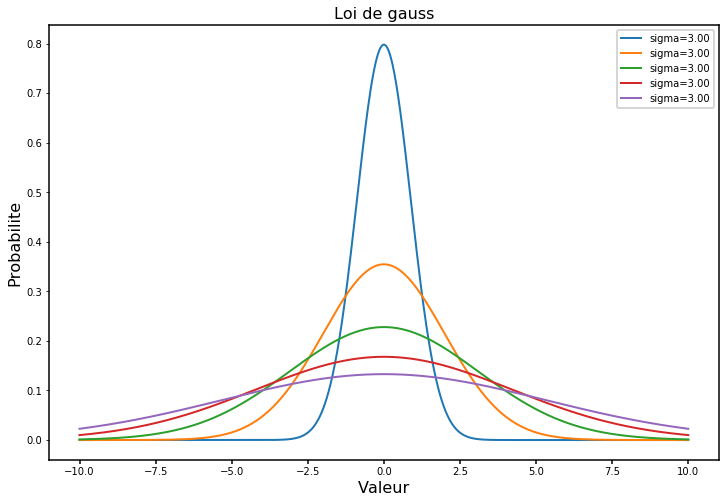

In [92]:
def Gaussian(mu, sigma, x):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-((x-mu)/(np.sqrt(2*np.pi)*sigma))**2)

time = np.linspace(-10,10, 1024)
fig, ax = plt.subplots(1,figsize=(12,8))
ax.set_xlabel('Valeur')
ax.set_ylabel('Probabilite')
ax.set_title('Loi de gauss')
for sigma in np.linspace(5e-1,3,5):
    ax.plot(time, Gaussian(0, sigma, time), label='sigma={:.2f}'.format(lam))
ax.legend()

#### Poisson distribution

* PMF (probability mass function) is
\begin{align*}
    P(X=k|\lambda) = \frac{\lambda^k}{k!} e^{-\lambda}
\end{align*}

with $k \in \mathbb{N}$. It also as a natural extension to $\mathbb{R}$:
\begin{align*}
 P2 &: \mathbb{R}^+ \times \mathbb{R}^+ \rightarrow [0,1] \\
 P2(x,\lambda) &= \frac{\lambda^{x} e^{-\lambda}}{\Gamma(x+1)}
\end{align*}
* Expectation is $\lambda$
* Variance is $\lambda$

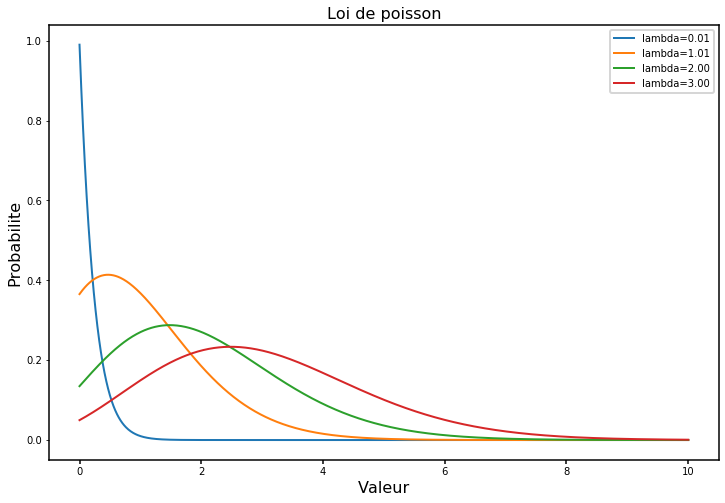

In [90]:
#Extend Poisson distribution to real cases
def Poisson2(lambdaParam,x):
    return (np.power(lambdaParam,x)*np.exp(-lambdaParam))/scsp.gamma(x+1)

time = np.linspace(0,10, 1024)
fig, ax = plt.subplots(1,figsize=(12,8))
ax.set_xlabel('Valeur')
ax.set_ylabel('Probabilite')
ax.set_title('Loi de poisson')
for lam in np.linspace(1e-2,3,4):
    ax.plot(time, Poisson2(lam, time), label='lambda={:.2f}'.format(lam))
ax.legend()

#### Gamma law

* PDF is
\begin{align*}
    f(x,k,\theta )= \frac{x^{k-1}e^{-\frac{x}{\theta}}}{\gamma(k) \theta ^{k}}
\end{align*}

with $\theta>0$

* Expectation is $k\theta$
* Variance is $k\theta^2$

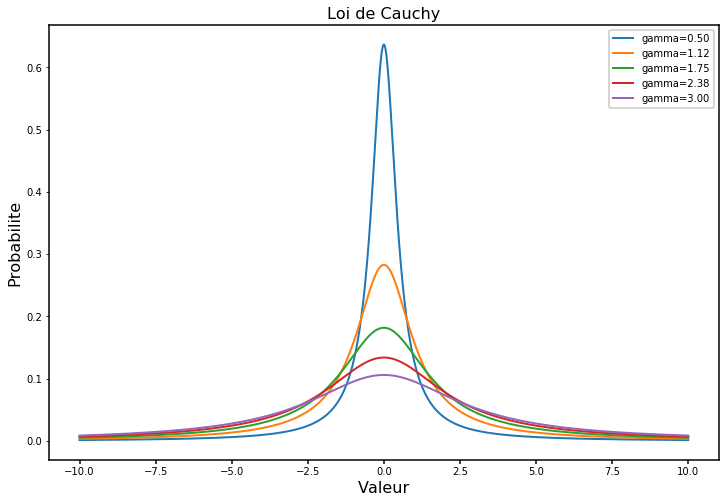

In [86]:
def Gamma(x0, k, theta, x):
    return sist.gamma.pdf(x, a=k, loc=x0, scale=theta)

time = np.linspace(0,20, 1024)
fig, ax = plt.subplots(1,figsize=(12,8))
ax.set_xlabel('Valeur')
ax.set_ylabel('Probabilite')
ax.set_title('Loi Gamma')
for k in np.linspace(1,9,5):
    ax.plot(time, Gamma(0, k, 1, time), label='k={:.2f}, theta=1'.format(k))
ax.legend()

#### Cauchy distribution

* PDF is
\begin{align*}
    f(x, x_0,a) = \frac{1}{ \pi a\left[ 1+ \left(\frac{x-x_0}{a}\right)^2\right]}
\end{align*}

with $a>0$

* Expectation is undefined
* Variance is undefined

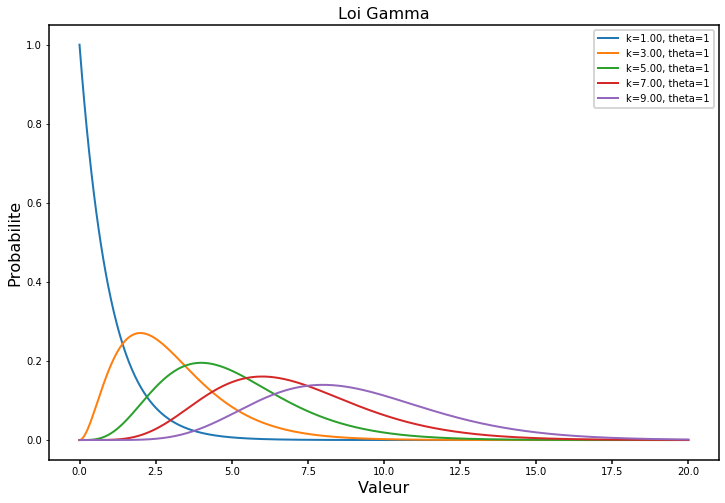

In [89]:
def Cauchy(x0, gamma, x):
    return sist.cauchy.pdf(x, loc=x0, scale=gamma)

time = np.linspace(-10,10, 1024)
fig, ax = plt.subplots(1,figsize=(12,8))
ax.set_xlabel('Valeur')
ax.set_ylabel('Probabilite')
ax.set_title('Loi de Cauchy')
for gamma in np.linspace(5e-1,3,5):
    ax.plot(time, Cauchy(0, gamma, time), label='gamma={:.2f}'.format(gamma))
ax.legend()

In [32]:
def psnr(signal, reference):
    # First, check type
    #assert(reference.dtype==np.uint16)
    #t = np.iinfo(reference.dtype)
    t=_dt
    var = np.mean((signal-reference)**2)
    psnr = ((t.max-t.min)**2) / var
    psnr = 10*np.log10(psnr)
    return psnr

# Gaussian noise and averaging


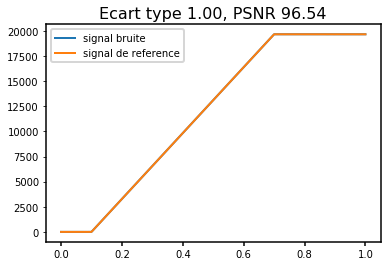

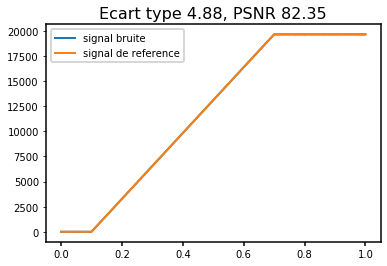

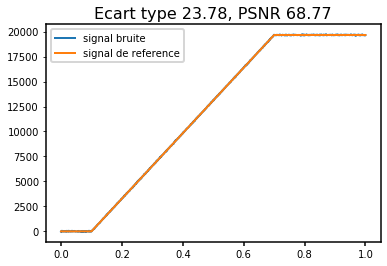

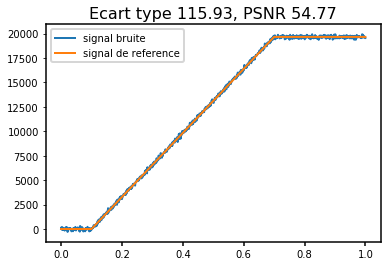

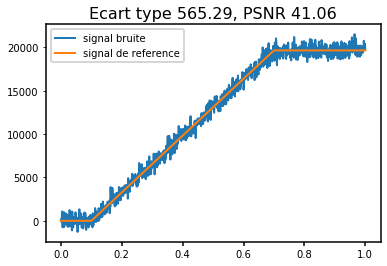

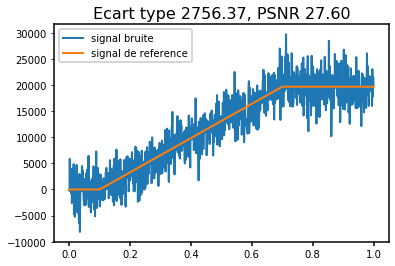

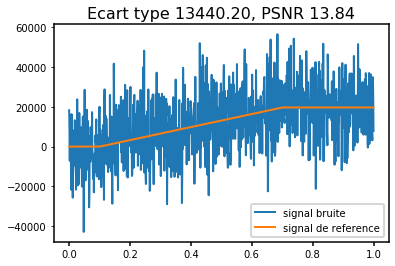

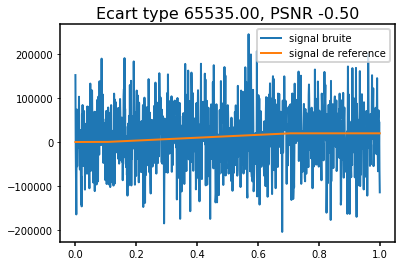

In [33]:
signal = _signal*0.30*_dynamic+0.02*_offset
for std in np.logspace(np.log10(1), np.log10(_dynamic), 8):
    noise = np.random.normal(0, std, len(_time))
    res = signal + noise
    fig, ax = plt.subplots(1)
    ax.set_title('Ecart type {:.2f}, PSNR {:.2f}'.format(std, psnr(res, signal)))
    ax.plot(_time, res, label='signal bruite')
    ax.plot(_time, signal, label='signal de reference')
    ax.legend()

# PSNR et compositage


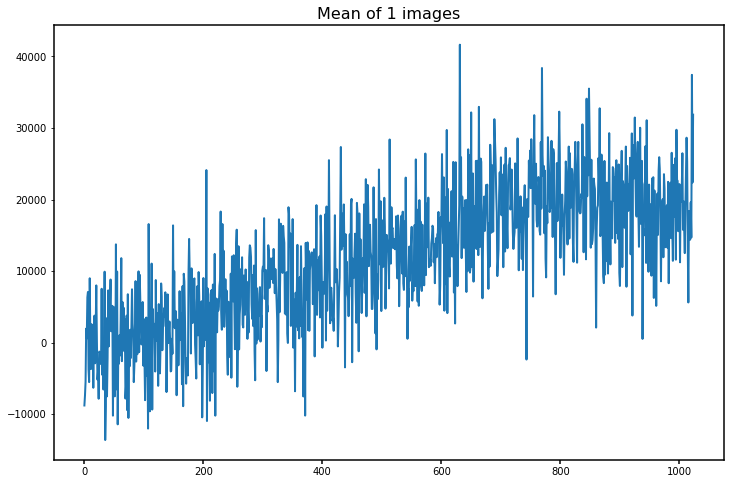

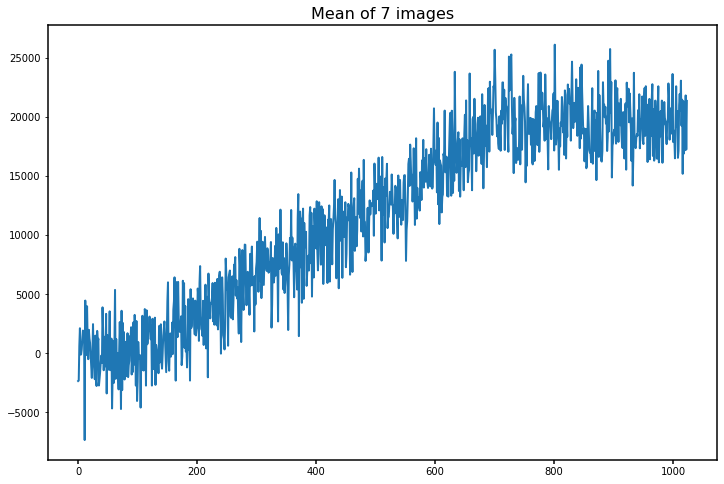

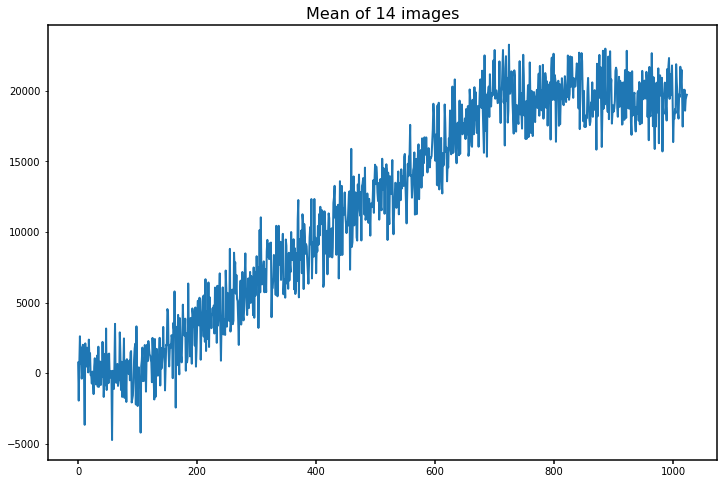

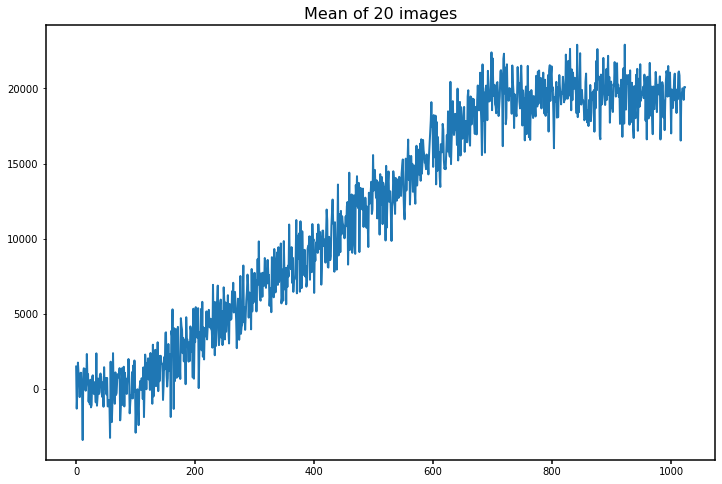

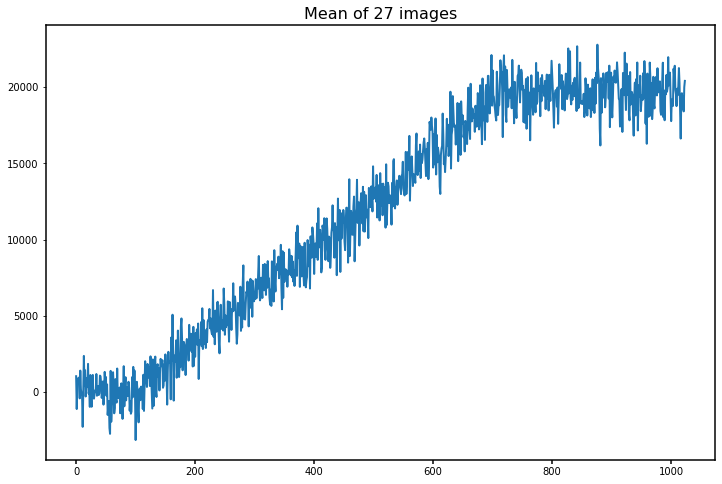

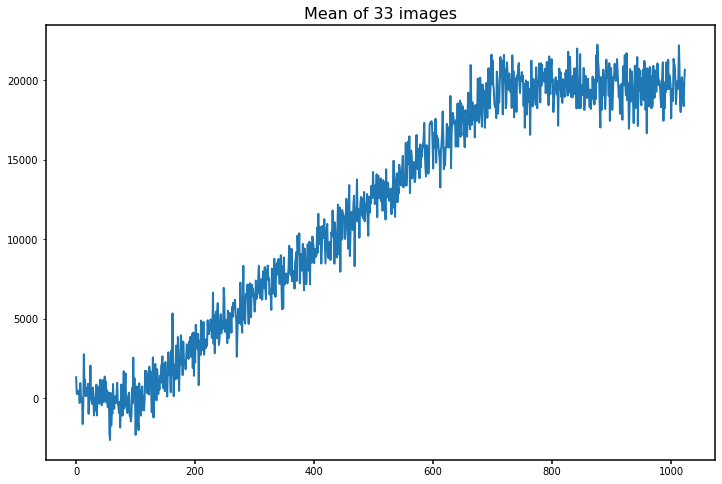

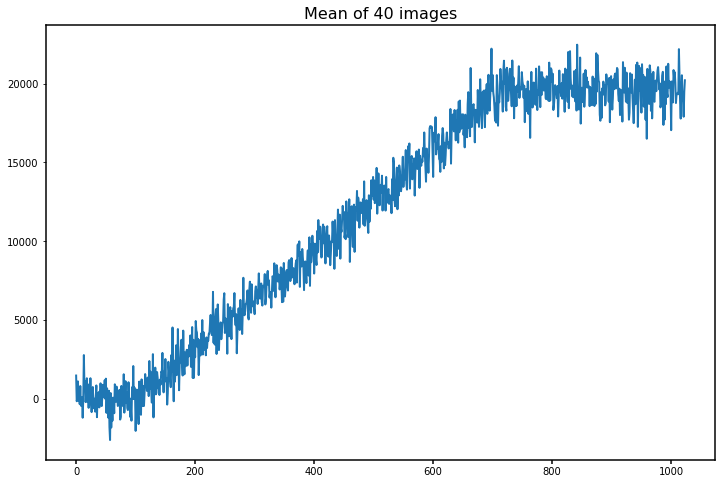

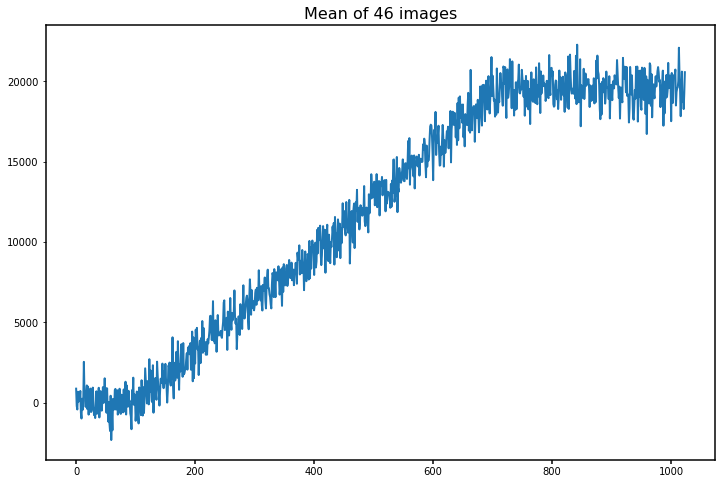

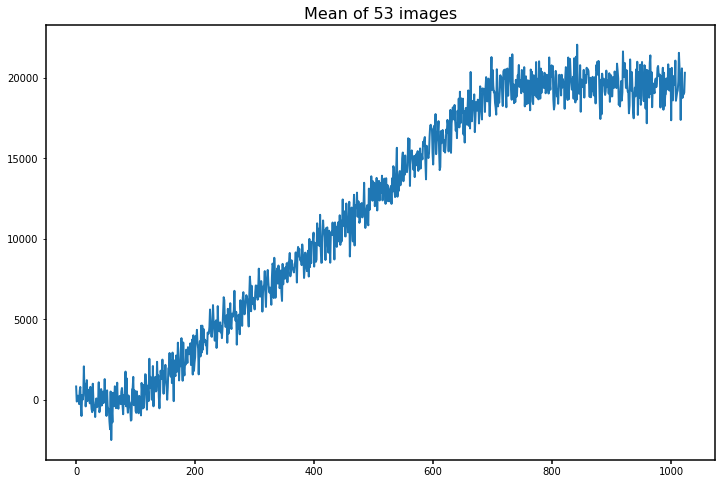

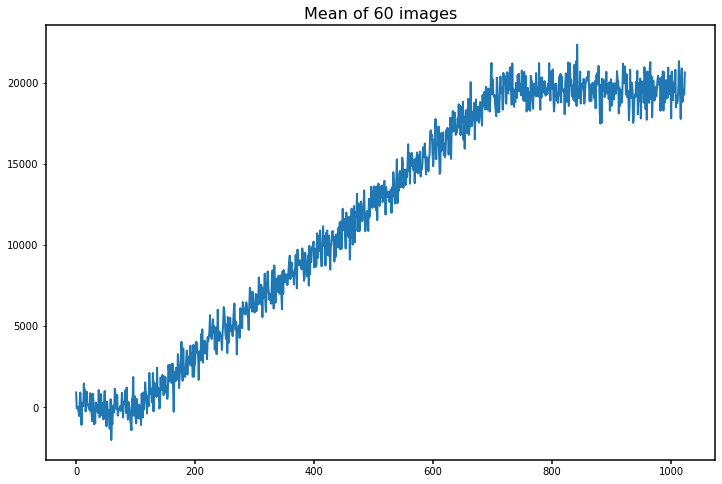

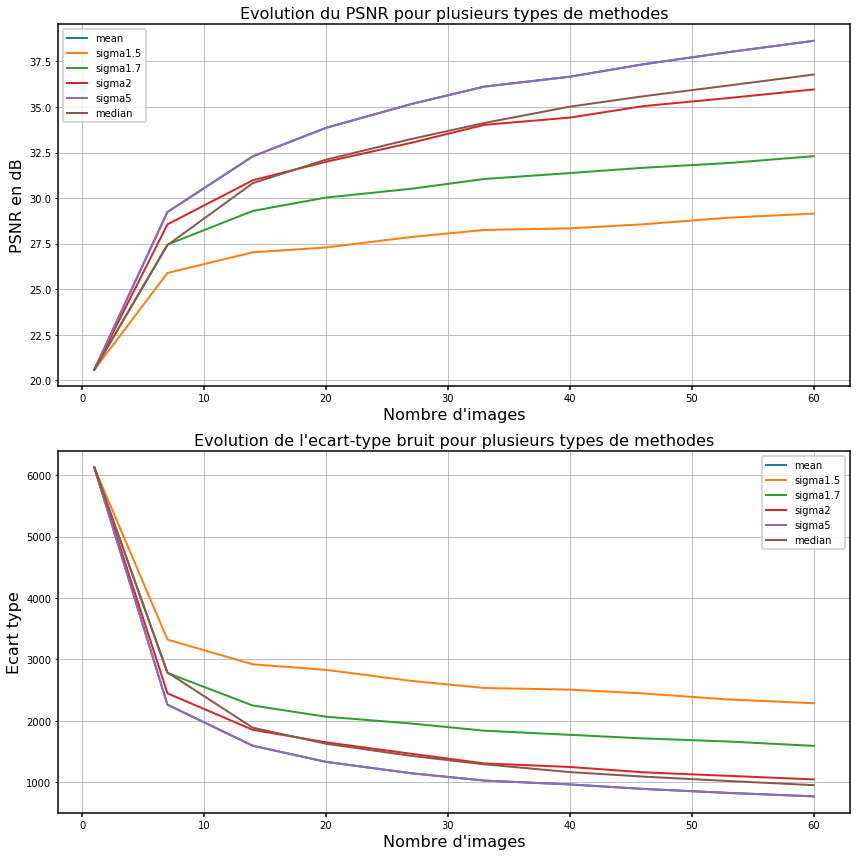

In [35]:
def composite(stack):
    d = {}
    d["mean"] = np.mean(stack, axis=0)
    d["sigma1.5"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=1.5, high=1.5)[0]) for i in range(stack.shape[1])])
    d["sigma1.7"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=1.7, high=1.7)[0]) for i in range(stack.shape[1])])
    d["sigma2"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=2.0, high=2.0)[0]) for i in range(stack.shape[1])])
    #d["sigma3"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=3.0, high=3.0)[0]) for i in range(stack.shape[1])])
    #d["sigma4"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=4.0, high=4.0)[0]) for i in range(stack.shape[1])])
    d["sigma5"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=5.0, high=5.0)[0]) for i in range(stack.shape[1])])
    d["median"] = np.median(stack, axis=0)
    return d
                           
signal = _signal*0.30*_dynamic+0.02*_offset
std = 6000
nb_images = np.linspace(1, 60, 10).astype(np.int32)
resultpsnr = {}
resultstd = {}
stack = np.zeros((nb_images[-1], len(_time)))
stack_idx=0

for nb_image in nb_images:
    for instance in range(stack_idx, nb_image):
        stack[instance,:] = signal+np.random.normal(0, std, len(_time))
    stack_idx = nb_image
    res = composite(stack[:stack_idx,:])
    if nb_image%1 ==0:
        #print('shape is {}'.format(res['mean'].shape))
        fig, ax = plt.subplots(1,figsize=(12,8))
        ax.set_title('Mean of {} images'.format(nb_image))
        #ax.plot(signal)
        ax.plot(res['mean'])
    for key, val in res.items():
        if key in resultpsnr:
            resultpsnr[key].append(psnr(val, signal))
            resultstd[key].append(np.std(val-signal))
        else:
            resultpsnr[key]=[psnr(val, signal)]
            resultstd[key]=[np.std(val-signal)]
    
fig, ax = plt.subplots(2,figsize=(12,12))
for (key, psnr_val), (key, std_val) in zip(resultpsnr.items(), resultstd.items()):
    ax[0].plot(nb_images, psnr_val, label=key)
    ax[1].plot(nb_images, std_val, label=key)

ax[0].set_title('Evolution du PSNR pour plusieurs types de methodes')
ax[0].set_xlabel('Nombre d\'images')
ax[0].set_ylabel('PSNR en dB')
ax[0].grid()
ax[0].legend()

ax[1].set_title('Evolution de l\'ecart-type bruit pour plusieurs types de methodes')
ax[1].set_xlabel('Nombre d\'images')
ax[1].set_ylabel('Ecart type')
ax[1].grid()
ax[1].legend()
fig.tight_layout()

# Exemple of non gaussian noise

In [ ]:
# we try to do a Chi square test on the variance equality for various number of images

nb_images = np.linspace(1, 60, 10).astype(np.int32)

for nb_image in nb_images:
    stack = np.zeros((nb_image, len(_time)))
    for instance in range(nb_image):
        _, signal_bruite, _, _ = generate_instance()
        stack[instance,:] = signal_bruite

    res = composite(stack)
    if nb_image%1 ==0:
        fig, ax = plt.subplots(1,figsize=(12,8))
        ax.set_title('Mean of {} images'.format(nb_image))
        ax.plot(res['mean'])
    for key, val in res.items():
        if key in resultpsnr:
            resultpsnr[key].append(psnr(val, signal))
            resultstd[key].append(np.std(val))
        else:
            resultpsnr[key]=[psnr(val, np.zeros_like(val))]
            resultstd[key]=[np.std(val)]


#### $\chi^2$ test for variance testing

One can check a set of $n$ samples $s$ with variance estimation $\sigma_{s}^2$ against a reference normal distribution of known variance $\sigma^2$, with this simple formula:

\begin{align*}
  Q = \frac{(n-1)\sigma_{s}^2}{\sigma^2}
\end{align*}

The degrees of freedom chosen for the $\chi^2$ probability distribution function is $n-1$

We can do a small numerical experiment where we try to divide the histogram into equivalent bins, and test for "equality" of variance for each subrange, with the overall variance as reference.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Reference std for the whole dataset is 6.806500259386192
stds for each subset: [1.1658531622294244, 3.313975509382372, 3.817593567869135, 4.6080855762665465, 6.007882192274027, 5.662783243384735, 6.266439158403193, 8.26475662423199, 8.063545759983866, 8.550872799657334]
Q values for each subset: [4.782198331791271, 14.46041288435261, 18.87482353928459, 27.50075335386264, 47.525305835160815, 41.53014009551772, 50.85634848823635, 89.93779642898389, 84.20844143662467, 96.27266549956096]


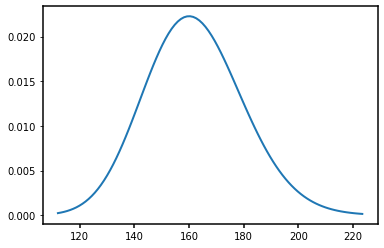

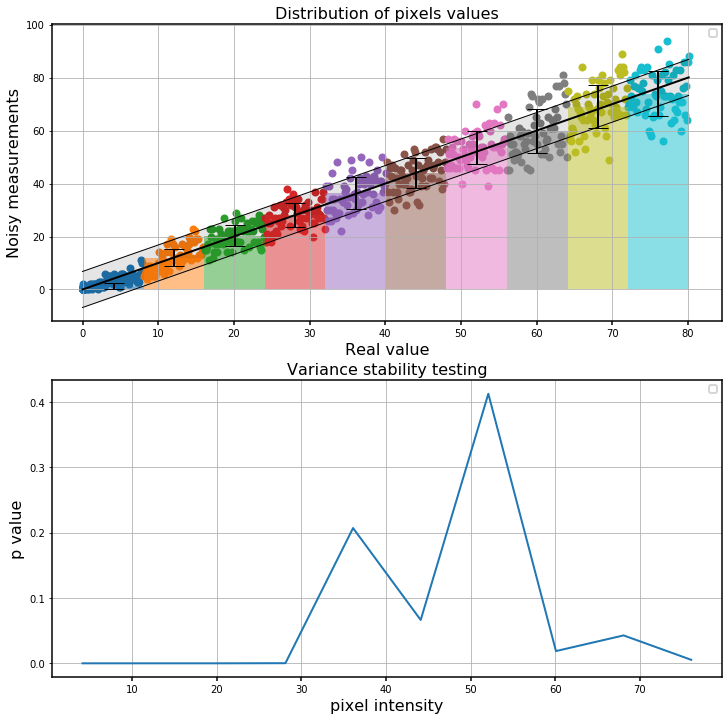

In [84]:
# We will try to divide the histogram into 10 bins
nb_bins = 10
signal_reel, signal_bruite, offset_bruite, dark_bruite = generate_instance()
datas = signal_bruite-signal_reel
reference_std = datas.std()
hist, bin_edges = np.histogram(signal_reel, bins=nb_bins)
bins_center = list(map(lambda a: 0.5*(a[0]+a[1]), zip(bin_edges[:-1],bin_edges[1:])))

# estimate std for each subsample
point_list = [datas[(signal_reel>=edge_low)*(signal_reel<edge_high)] for
              edge_low, edge_high in zip(bin_edges[:-1],bin_edges[1:])]

# Now perform statistical test for each group
print("Reference std for the whole dataset is {}".format(reference_std))
stds = [x.std() for x in point_list]
print("stds for each subset: {}".format(stds))
qvalues = list(map(lambda x : (x.size-1)*(x.std()/reference_std)**2, point_list))
print("Q values for each subset: {}".format(qvalues))
tests = list(map(lambda pq: 2*min(sist.chi2.cdf(pq[1], len(pq[0])-1), sist.chi2.sf(pq[1], len(pq[0])-1)), zip(point_list, qvalues)))

k=len(point_list[0])-1
x = np.linspace(sist.chi2.ppf(0.001, k-1),
      sist.chi2.ppf(0.999, k-1), 100)
# no need to take into account continuity correction
chi2pdf = sist.chi2.pdf(x, k-1)
plt.plot(x,chi2pdf)
    
# Now plot
fig, ax = plt.subplots(2,figsize=(12,12))
for hist_bin in range(nb_bins):
    mask = (signal_reel>=bin_edges[hist_bin])*(signal_reel<bin_edges[hist_bin+1])
    c = ax[0].scatter(signal_reel[mask], signal_bruite[mask])
    ax[0].bar(bins_center[hist_bin], np.mean(signal_bruite[mask]), width=bin_edges[hist_bin+1]-bin_edges[hist_bin],
              yerr=stds[hist_bin], align='center', alpha=0.5, ecolor='black', capsize=10, color=c.get_facecolors()[0].tolist()
)
# Bar of the whole dataset
xref = [0,signal_reel.max()]
yref = [0,signal_reel.max()]
ax[0].plot(xref, yref,c='black')
ax[0].plot(xref, yref-reference_std,c='black',linewidth=1)
ax[0].plot(xref, yref+reference_std,c='black',linewidth=1)
ax[0].fill_between(xref, yref-reference_std, yref+reference_std, facecolor='black', interpolate=True, alpha=0.1)
#ax[0].bar(0.5*(signal_reel.min()+signal_reel.max()), signal_bruite.mean(), width=bin_edges[-1]-bin_edges[0],
#          yerr=reference_std, align='center', alpha=0.2, ecolor='black', capsize=10)
ax[0].set_title('Distribution of pixels values')
ax[0].set_xlabel('Real value')
ax[0].set_ylabel('Noisy measurements')
ax[0].grid()
ax[0].legend()

ax[1].plot(bins_center, tests)
ax[1].set_title('Variance stability testing')
ax[1].set_xlabel('pixel intensity')
ax[1].set_ylabel('p value')
ax[1].grid()
ax[1].legend()

Very good candidate method for dark substraction:

\begin{align*}
    synth_{dark} &= \sum_{i=0}^{3} a_i r_i \qquad \text{s.t} \\
          \begin{pmatrix} a_0\\ a_1\\ a_2\\ a_3\end{pmatrix} &= \underset{a \in \mathbb{R}^4}{argmin} \| \left(image - \sum_{i=0}^{3} a_i r_i \right) - \left( \frac{1}{card(image)} \left(image_i - \sum_{i=0}^{3} a_i (r_i)_j \right) \cdot \vec{1}_{card(image)} \right) \vec{1}_{card(image)} \|_2^2
\end{align*}

Lets write for simplicity:
* $card(image) = c$ a scalar standing for the total number of pixels in the image
* $\begin{pmatrix} a_0\\ a_1\\ a_2\\ a_3\end{pmatrix} = \vec{x}$ the actual vector of weighting coefficients
* $\begin{pmatrix} -\vec{r_0} & -\vec{r_1} & -\vec{r_2} & -\vec{r_3}\end{pmatrix} = A$ the matrix containing the candidate dark images.
* $image = -\vec{y}$ The vector $image$ representing the actual image from which we would like to remove dark signal

We can now rewrite
\begin{align*}
          x &= \underset{x \in \mathbb{R}^4}{argmin} \| A\vec{x}-\vec{y} - \left(\frac{1}{c} (A\vec{x}-\vec{y})\cdot\vec{1}_{c} \right) \vec{1}_{c} \|_2^2 \\
\end{align*}

To simplify this further, we would also like to identify 
* $ A\vec{x}-\vec{y}$ as $\vec{v}$
to make the expression simpler to develop:
\begin{align*}
          x &= \underset{x \in \mathbb{R}^4}{argmin} \qquad \| A\vec{x}-\vec{y} - \left( \frac{1}{c} (A\vec{x}-\vec{y})\cdot\vec{1}_{c}\right) \vec{1}_{c} \|_2^2 \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad \| \vec{v} - \left( \frac{1}{c} (\vec{v}\cdot\vec{1}_{c}) \right) \vec{1}_{c} \|_2^2 \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad v^{T}v + \frac{1}{c^2} (v^{T}1_{c})^2 (1_{c}^{T}1_{c}) - \frac{2}{c} (v^{T}1_{c})(v^{T}1_{c}) \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad v^{T}v + \frac{1}{c^2} (1_{c}^{T}1_{c} - 2c)(v^{T}1_{c})^2 \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad v^{T}v + \frac{1}{c^2} (c - 2c)(v^{T}1_{c})^2 \qquad \text{because } \; 1_{c}^{T}1_{c} = c\\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad v^{T}v - \frac{1}{c} (v^{T}1_{c})^2 \\          
\end{align*}

Lets now plug back in our slightly more complex expression:

\begin{align*}
          x &= \underset{x \in \mathbb{R}^4}{argmin} \qquad v^{T}v - \frac{1}{c} (v^{T}1_{c})^2 \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad (Ax-y)^{T}(Ax-y) - \frac{1}{c} \left( (Ax-y)^{T}1_{c} \right)^2 \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad x^{T}A^{T}Ax + y^{T}y -2y^{T}Ax - \frac{1}{c} \left( (1_{c}^{T}Ax-1_{c}^{T}y)^2 \right) \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad x^{T}A^{T}Ax + y^{T}y -2y^{T}Ax - \frac{1}{c} \left( x^{T}(A^{T}1_{c}(A^{T}1_{c})^{T})x + (1_{c}^{T}y)^2 -2(1_{c}^{T}y)1_{c}^{T}Ax ) \right) \\
          &= \underset{x \in \mathbb{R}^4}{argmin} \qquad \underbrace{x^{T}A^{T}Ax -\frac{1}{c} x^{T}(A^{T}1_{c}(A^{T}1_{c})^{T})x}_{\text{Quadratic part}} \; + \; \underbrace{-2y^{T}Ax +\frac{2}{c}(1_{c}^{T}y)1_{c}^{T}Ax )}_{\text{Linear part}} \; + \; \underbrace{y^{T}y -\frac{1}{c}(1_{c}^{T}y)^2}_{Constant part} \\
\end{align*}

This expression looks pretty familiar, it simply looks like the sum of two quadratic problems.
Proving convexity then amount to prove that Hessian is definite positive.

\begin{align*}
    H = A^{T}A - \frac{1}{c} A^{T}1_{c}(A^{T}1_{c})^{T}
\end{align*}

We see directy that $A^{T}A$ is symmetric, so we should be fine with semi definiteness beside trivial case (A=0). Lets take a closer look at this other weird expression

\begin{align*}
    A^{T}1_{c}(A^{T}1_{c})^{T}
\end{align*}

We decided to write that matrix this way because it shows that it can be rewritten $M^{T}M$ by identifying $M=(A^{T}1_{c})^{T}$. Hence it was easy to prove that the matrix is symmetric, hence $H$ is symmetric, then the Hessian of the problem is at least positive semi definite.

Thanks to basic matrix calculus rule, we can simply differentiate now the general coest function expression in $x$:

\begin{align*}
          f(x) &= \underbrace{x^{T}A^{T}Ax -\frac{1}{c} x^{T}(A^{T}1_{c}(A^{T}1_{c})^{T})x}_{\text{Quadratic part}} \; + \; \underbrace{-2y^{T}Ax +\frac{2}{c}(1_{c}^{T}y)1_{c}^{T}Ax )}_{\text{Linear part}} \; + \; \underbrace{y^{T}y -\frac{1}{c}(1_{c}^{T}y)^2}_{Constant part} \\
          \frac{\partial f(x)}{\partial x} &= 2 A^{T}Ax - \frac{2}{c}(A^{T}1_{c}(A^{T}1_{c})^{T})x -2A^{T}y + \frac{2}{c}(1_{c}^{T}y)A^{T}1_{c} \\
          &= \underbrace{\left( 2 A^{T}A - \frac{2}{c}(A^{T}1_{c}(A^{T}1_{c})^{T}) \right)}_{B} x - \underbrace{2A^{T}y - \frac{2}{c}(1_{c}^{T}y)A^{T}1_{c}}_{z} \\
          &= Bx-z
\end{align*}

Thanks to basic rules for convex quadratic problem, optimum is found when derivative vanishes, which is true in:
\begin{align*}
    \frac{\partial f(x)}{\partial x} &= 0 \\
    Bx-z &= 0 \\
    x &= B^{-1}z \\
    &= \left( 2 A^{T}A - \frac{2}{c}(A^{T}1_{c}(A^{T}1_{c})^{T}) \right)^{-1} \left( 2A^{T}y - \frac{2}{c} (1_{c}^{T}y) A^{T}1_{c}\right)
\end{align*}


(-0.5, 1023.5, 767.5, -0.5)

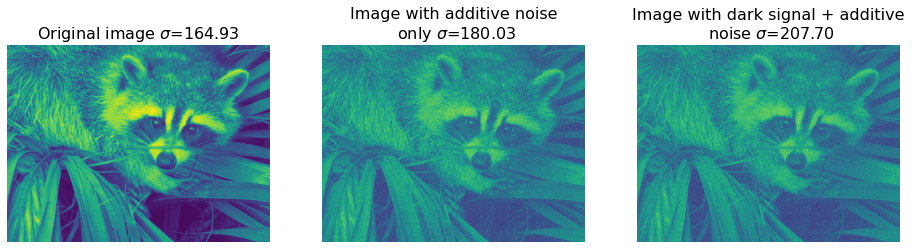

In [46]:
# Trying this out with a small numerical implementation
import scipy.misc as misc
import matplotlib.pyplot as plt
import numpy as np

image = misc.face().sum(axis=2)
noise = np.random.rand(*image.shape) * 250
dark1 = np.random.rand(*image.shape) * 360
dark2 = dark1*0.8
#dark2 = np.random.rand(*image.shape) * 350

fig, ax = plt.subplots(1,3,figsize=(16,9))
ax[0].set_title(f"Original image $\sigma$={image.std():.2f}")
ax[0].imshow(image)
ax[0].axis('off')
noisy_im = image+noise
ax[1].set_title(f"Image with additive noise\n only $\sigma$={noisy_im.std():.2f}")
ax[1].imshow(im)
ax[1].axis('off')
real_im=image+noise+dark1
ax[2].set_title(f"Image with dark signal + additive\n noise $\sigma$={real_im.std():.2f}")
ax[2].imshow(real_im)
ax[2].axis('off')


Found solution vector [-1.953125  3.6875  ]


(-0.5, 1023.5, 767.5, -0.5)

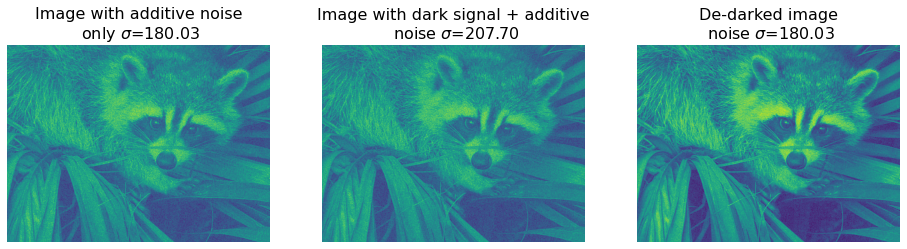

In [47]:
# Now, let see if that bunch of mathematical stuff was useful in the end
c=image.size
one = np.ones(c)
A = np.stack((-dark1.flatten(), -dark2.flatten())).T #A.shape #(786432, 2)
y = -real_im.flatten()
atone = np.dot(A.T, one)
B = 2*np.dot(A.T,A) - (2/c)*np.outer(atone,atone)
z = 2*np.dot(A.T,y) - (2/c)*np.dot(one,y)*np.dot(A.T,one)
x = np.dot(np.linalg.inv(B),z)
synthetic_dark = np.dot(A,-x).reshape(image.shape)
print(f"Found solution vector {x}")

fig, ax = plt.subplots(1,3,figsize=(16,9))
ax[0].set_title(f"Image with additive noise\n only $\sigma$={noisy_im.std():.2f}")
ax[0].imshow(im)
ax[0].axis('off')
ax[1].set_title(f"Image with dark signal + additive\n noise $\sigma$={real_im.std():.2f}")
ax[1].imshow(real_im)
ax[1].axis('off')
dedark_im=real_im-synthetic_dark
ax[2].set_title(f"De-darked image\n noise $\sigma$={dedark_im.std():.2f}")
ax[2].imshow(dedark_im)
ax[2].axis('off')